# Assignment 02

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Health Analytics
- Course ID: BDA700NAA.05841.2247
- Data Source: 
    - https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/code
    - https://github.com/kamilpytlak/data-science-projects/tree/main/heart-disease-prediction/2022

## Goal: 
 Develop a model to predict the heart disease ("HadHeartAttack") based on the other variables.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# make sure to install the following packages on virtual environment
# pip install geopy pandas matplotlib numpy plotly

In [16]:
# load data
df = pd.read_csv('heart_2022_with_nans.csv')
# columns
print("Columns: \n", df.columns)
# first 5 observations
df.head()

Columns: 
 Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## Data Cleaning

In [35]:
# Remove null data
df = df.dropna().reset_index(drop=True)
# Check for null data for each column
print("Null data: \n", df.isnull().sum())
# Check the entire null data
print("Null data: \n", df.isnull().sum().sum())

Null data: 
 State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms         

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  int64  
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  int64  
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  float64
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [37]:
# Labeling data

# GeneralHealth; ordering data
dict1 = {'Excellent': 5, 'Very good': 4, 'Good': 3, 'Fair': 2, 'Poor': 1}
# LastCheckupTime; ordering data
dict2 = {
    'Within past year (anytime less than 12 months ago)': 1, 
    'Within past 2 years (1 year but less than 2 years ago)': 2, 
    'Within past 5 years (2 years but less than 5 years ago)': 3,
    '5 or more years ago': 4
    }
# RemovedTeeth: ordering data
dict3 = {'None of them': 1, '1 to 5': 2, '6 or more, but not all': 3, 'All of them': 4}
# HadDiabetes: binary data
dict4 = {'No, pre-diabetes or borderline diabetes': 'Yes', 'Yes, but only during pregnancy (female)': 'No'}
# SmokerStatus: ordering data
dict5 = {'Never smoked': 1, 'Former smoker': 2, 'Current smoker - now smokes some days': 3, 'Current smoker - now smokes every day': 4}
# ECigaretteUsage: ordering data
dict6 = {
    'Never used e-cigarettes in my entire life': 1,
    'Not at all (right now)': 2,
    'Use them some days': 3,
    'Use them every day': 4
}
# AgeCategory: ordering data
dict7 = {
    'Age 18 to 24': 1,
    'Age 25 to 29': 2,
    'Age 30 to 34': 3,
    'Age 35 to 39': 4,
    'Age 40 to 44': 5,
    'Age 45 to 49': 6,
    'Age 50 to 54': 7,
    'Age 55 to 59': 8,
    'Age 60 to 64': 9,
    'Age 65 to 69': 10,
    'Age 70 to 74': 11,
    'Age 75 to 79': 12,
    'Age 80 or older': 13
}
# TetanusLast10Tdap: binary data
dict8 = {
    'No, did not receive any tetanus shot in the past 10 years': 'No',
    'Yes, received tetanus shot but not sure what type': 'Yes',
    'Yes, received Tdap': 'Yes',
    'Yes, received tetanus shot, but not Tdap': 'Yes'
}
# CovidPos: binary data
dict9 = {'Tested positive using home test without a health professional': 'Yes'}

# RemovedTeeth: ordering data
dict10 = {'None of them': 1, '1 to 5': 2, '6 or more, but not all': 3, 'All': 4}


# mapping defined dictionaries to the dataframe
df['GeneralHealth'] = df['GeneralHealth'].map(dict1).fillna(df['GeneralHealth'])
df['LastCheckupTime'] = df['LastCheckupTime'].map(dict2).fillna(df['LastCheckupTime'])
df['RemovedTeeth'] = df['RemovedTeeth'].map(dict3).fillna(df['RemovedTeeth'])
df['HadDiabetes'] = df['HadDiabetes'].map(dict4).fillna(df['HadDiabetes'])
df['SmokerStatus'] = df['SmokerStatus'].map(dict5).fillna(df['SmokerStatus'])
df['ECigaretteUsage'] = df['ECigaretteUsage'].map(dict6).fillna(df['ECigaretteUsage'])
df['AgeCategory'] = df['AgeCategory'].map(dict7).fillna(df['AgeCategory'])
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].map(dict8).fillna(df['TetanusLast10Tdap'])
df['CovidPos'] = df['CovidPos'].map(dict9).fillna(df['CovidPos'])
df['RemovedTeeth'] = df['RemovedTeeth'].map(dict10).fillna(df['RemovedTeeth'])

In [38]:
# Convert binary columns to 0 and 1, keep other columns as is
df_num = df.apply(lambda x: x.map({'Yes': 1, 'No': 0}) if set(x.unique()) == {'Yes', 'No'} else x)
# remove non-numeric columns
df_num = df_num.select_dtypes(include=['int64', 'float64'])
df_num.head()

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,4.0,4.0,0.0,1.0,1,9.0,1.0,0,0,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,4.0,0.0,0.0,1.0,1,6.0,1.0,0,0,0,...,1.78,95.25,30.13,0,0,1,1,1,0,0
2,4.0,0.0,0.0,1.0,0,8.0,3.0,0,0,0,...,1.85,108.86,31.66,1,0,0,1,0,0,1
3,2.0,5.0,0.0,1.0,1,9.0,1.0,0,0,0,...,1.70,90.72,31.32,0,0,1,1,0,0,1
4,3.0,3.0,15.0,1.0,1,5.0,2.0,0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


## Descriptive Analysis

### 1. Target Variable

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64


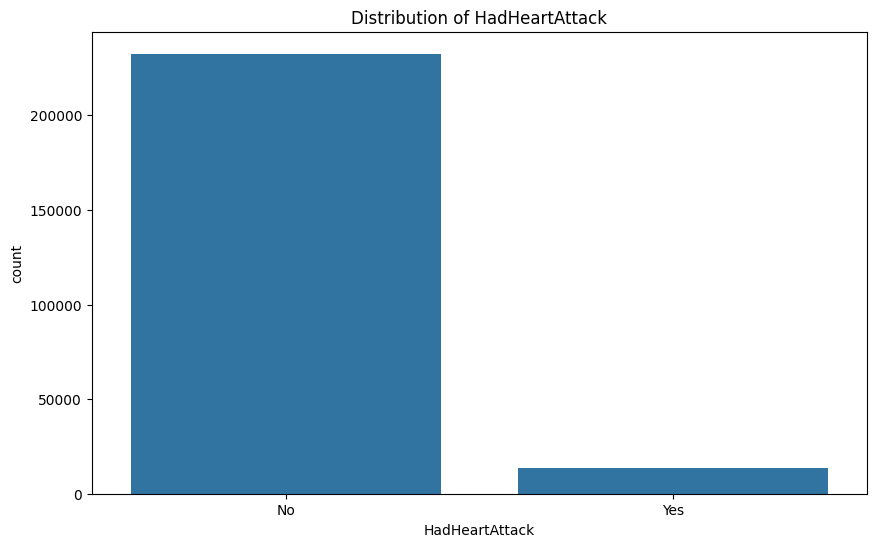

In [9]:
target = df['HadHeartAttack']
# check the distribution of the target variable
print(target.value_counts())
# plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=target)
plt.title('Distribution of HadHeartAttack')
plt.show()

### 2. Stacked Bar Chart
- Considering the target variable "HadHeartAttack".
- Each ratio is calculated by the proportion of "Yes" for each category.
- The higher the ratio, the more likely the independent variable leads to a heart attack.

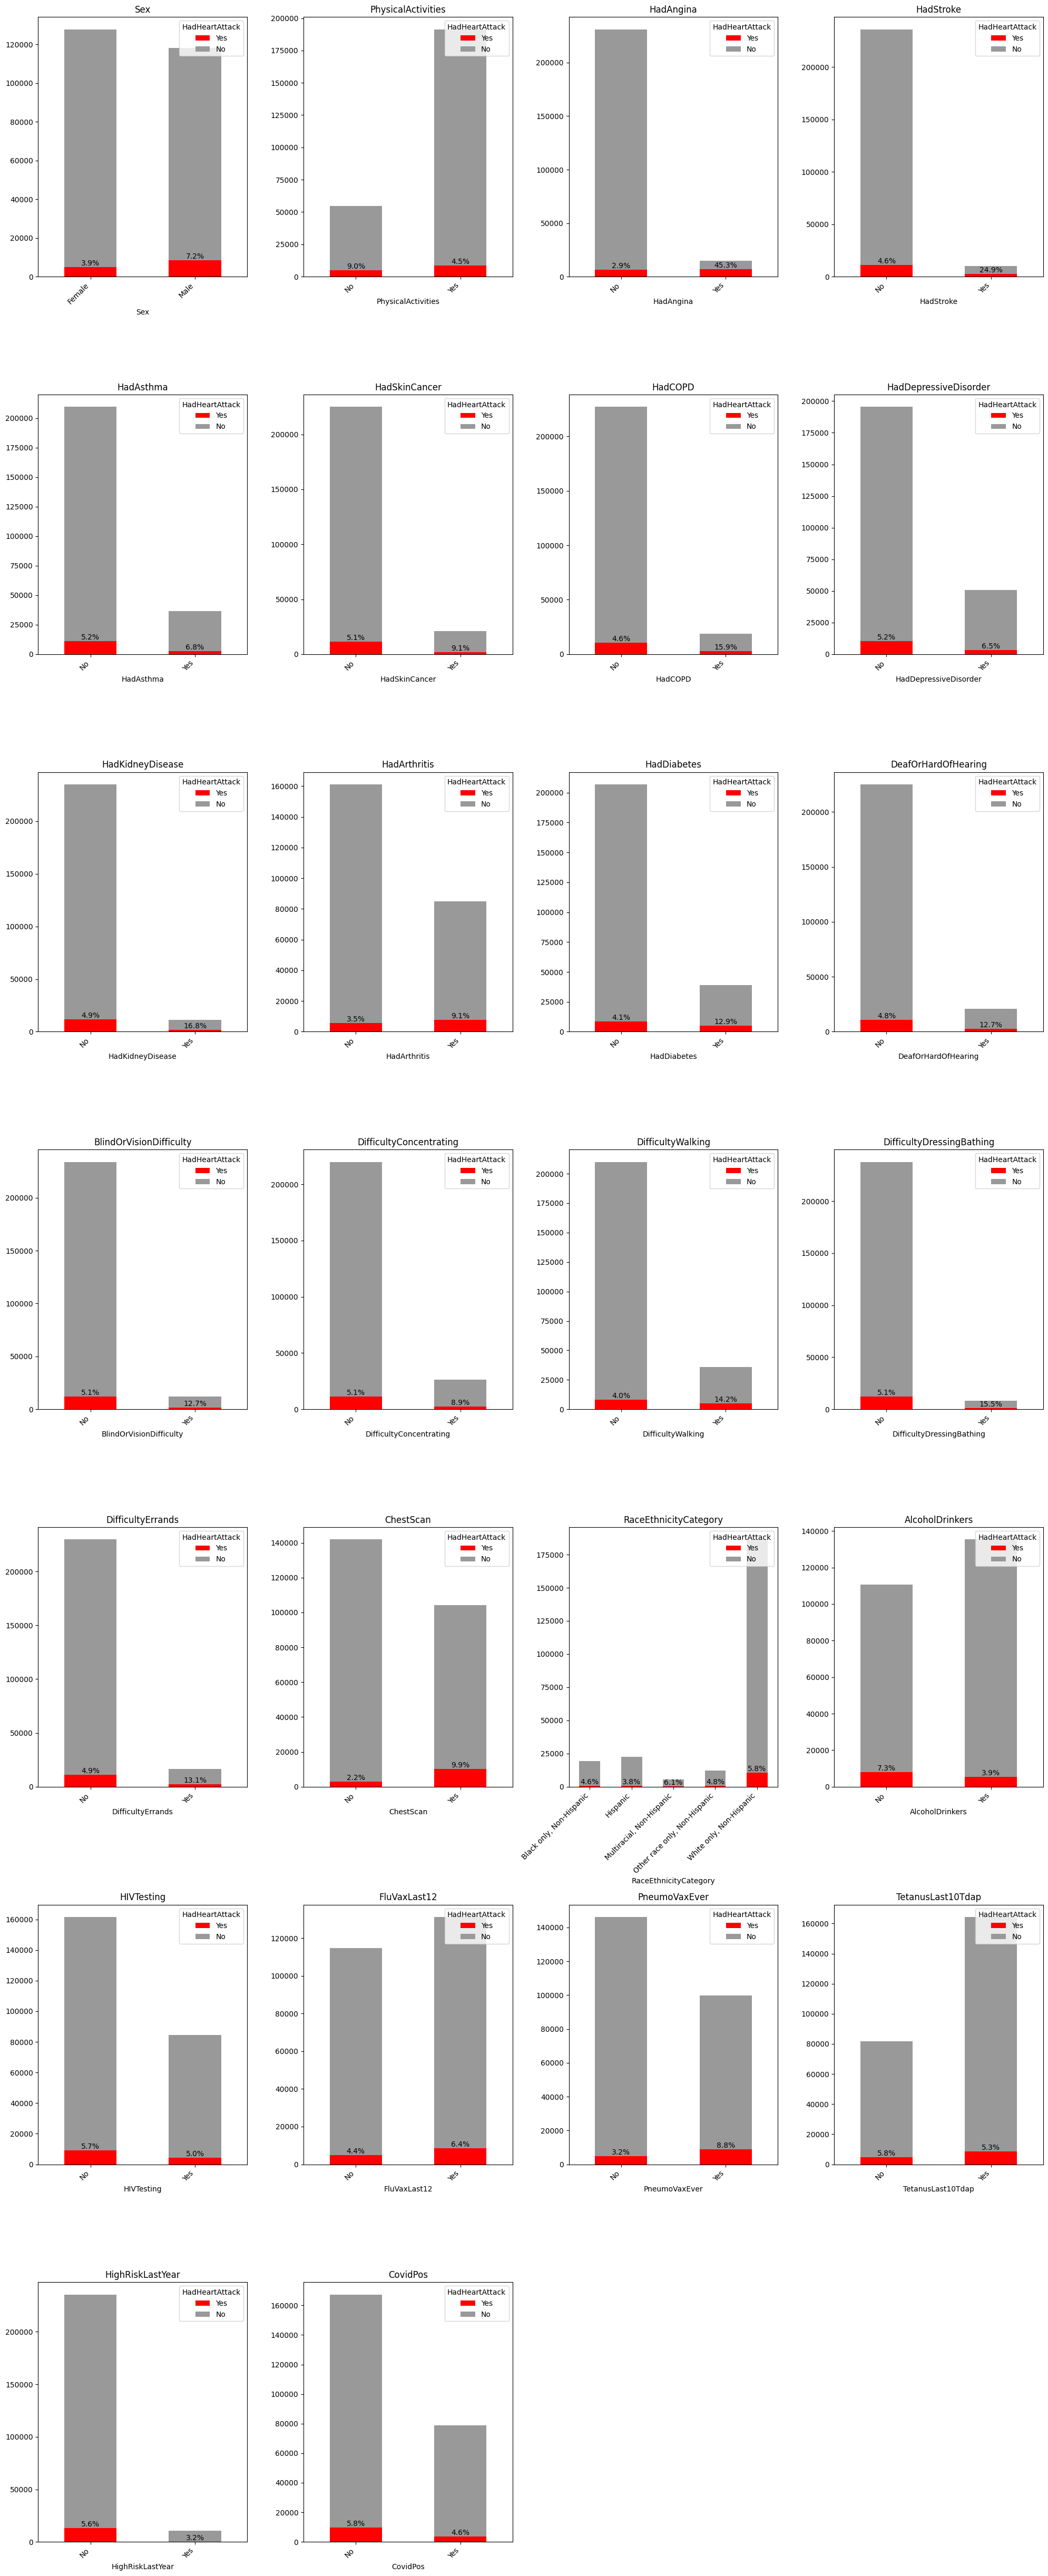

In [22]:
# Select object type columns excluding 'HadHeartAttack' and 'State'
object_columns= df.select_dtypes(include=['object']).columns
object_columns = object_columns.drop(['HadHeartAttack', 'State']) if 'HadHeartAttack' in object_columns and 'State' in object_columns else object_columns

# Determine the layout of the subplots
num_cols = 4  # Number of columns in the subplot grid
num_rows = (len(object_columns) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(20, num_rows * 7))  # Increased figure size for better readability

for i, col in enumerate(object_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Create a cross-tabulation of the current column and HadHeartAttack with counts
    cross_tab = pd.crosstab(df[col], df['HadHeartAttack'])
    
    # Reorder columns to have 'Yes' on top
    cross_tab = cross_tab[['Yes', 'No']]
    
    # Plot stacked bar chart with custom colors
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['red', '#999'])
    
    # Calculate and display the percentage of "Yes" for HadHeartAttack
    if 'Yes' in cross_tab.columns:
        yes_counts = cross_tab['Yes']
        total_counts = cross_tab.sum(axis=1)
        proportions = yes_counts / total_counts
        for idx, (count, prop) in enumerate(zip(yes_counts, proportions)):
            plt.text(idx, count, f'{prop:.1%}', ha='center', va='bottom')
    
    plt.title(col)
    plt.legend(title='HadHeartAttack', loc='upper right')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

### 3. Stacked Histogram

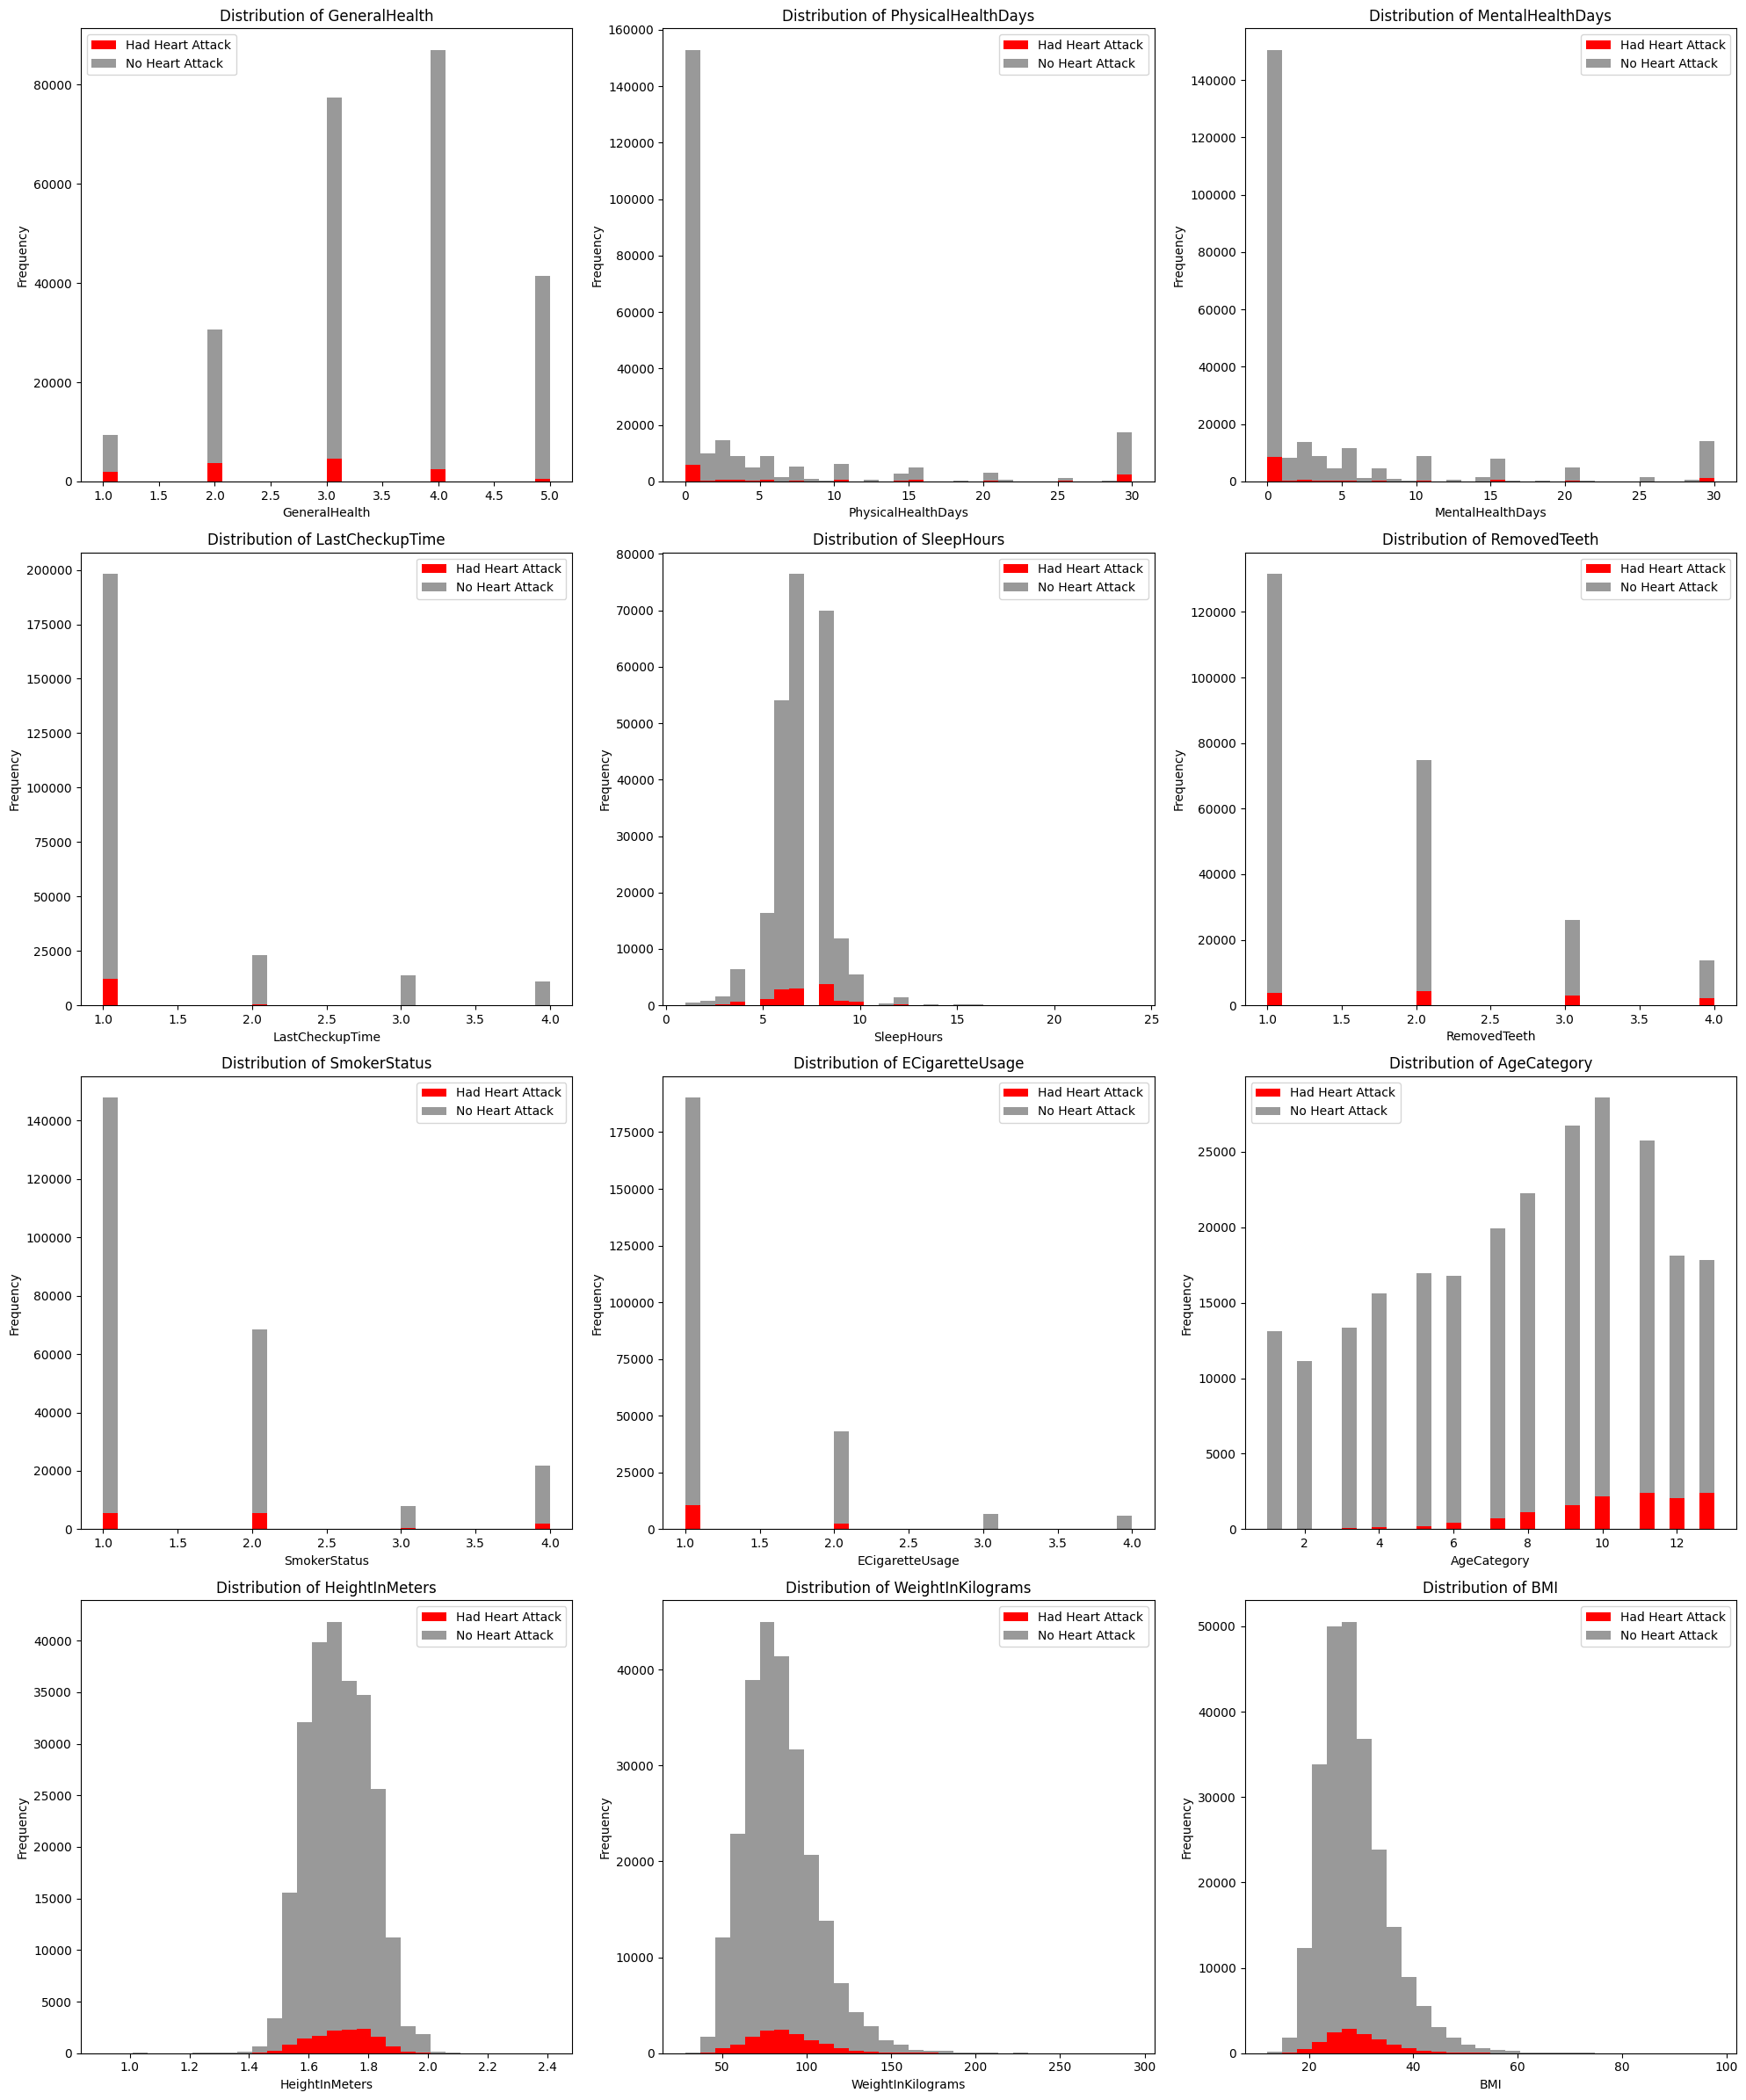

In [23]:
# Select numerical columns excluding 'HadHeartAttack'
numerical_columns= df.select_dtypes(include=['int64', 'float64']).columns
if 'HadHeartAttack' in numerical_columns:
    numerical_columns = numerical_columns.drop('HadHeartAttack')

# Determine the layout of the subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(20, num_rows * 6))  # Adjust figure size for better readability

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Create stacked histogram
    plt.hist([df[df['HadHeartAttack'] == 'Yes'][col], df[df['HadHeartAttack'] == 'No'][col]], 
             stacked=True, 
             label=['Had Heart Attack', 'No Heart Attack'],
             color=['red', '#999'],
             bins=30)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


### 4. Correlation Matrix

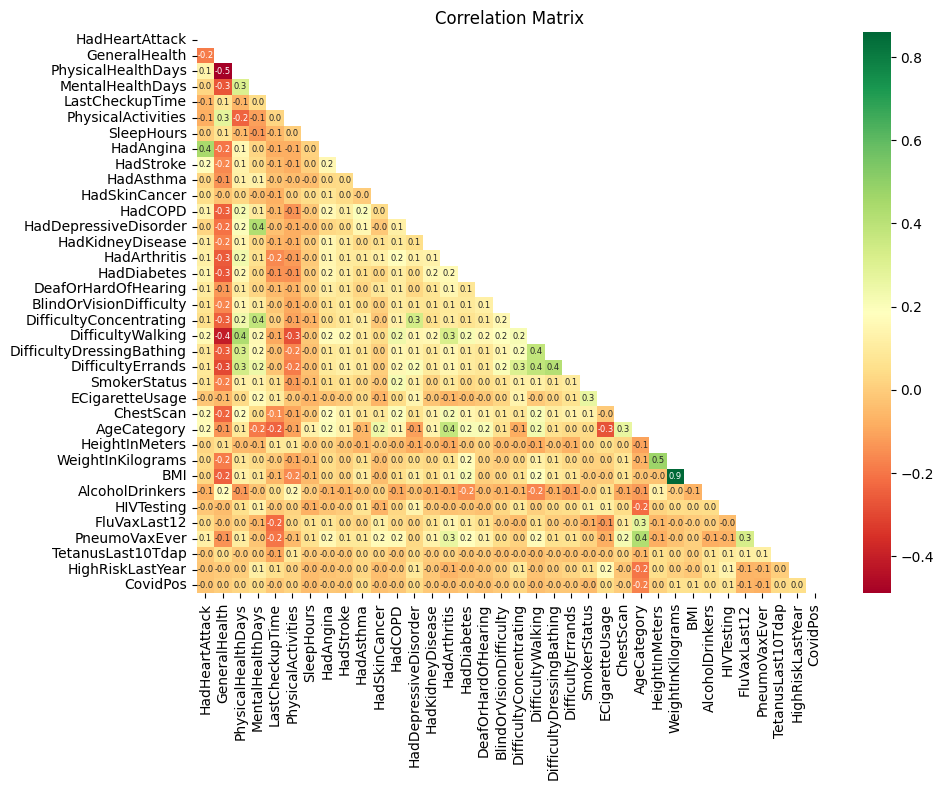

In [126]:
# show the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_num.corr()

# Reorder columns to put 'HadHeartAttack' first
columns = ['HadHeartAttack'] + [col for col in corr_matrix.columns if col != 'HadHeartAttack']
corr_matrix = corr_matrix.reindex(columns=columns, index=columns)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.1f', cmap='RdYlGn', annot_kws={'size': 6})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


## Feature Engineering

### 1. Feature Importance Based on Random Forest

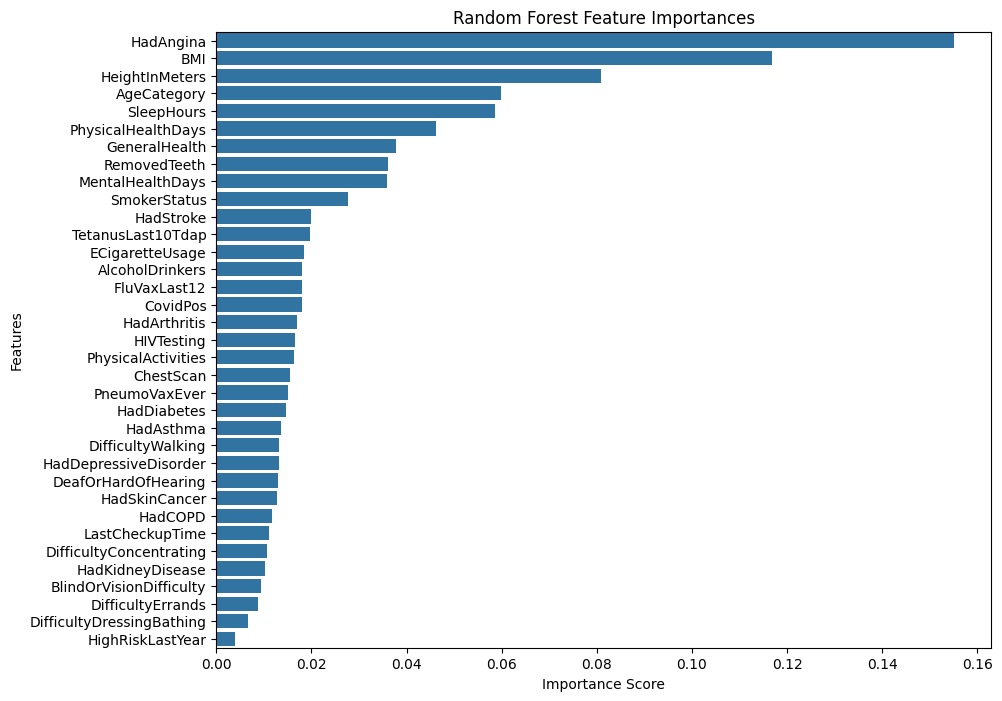

Top 20 features according to Random Forest: ['HadAngina', 'BMI', 'HeightInMeters', 'AgeCategory', 'SleepHours', 'PhysicalHealthDays', 'GeneralHealth', 'RemovedTeeth', 'MentalHealthDays', 'SmokerStatus', 'HadStroke', 'TetanusLast10Tdap', 'ECigaretteUsage', 'AlcoholDrinkers', 'FluVaxLast12', 'CovidPos', 'HadArthritis', 'HIVTesting', 'PhysicalActivities', 'ChestScan']


In [39]:
# Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier

# exclude columns that are not useful for the model
#  State, Sex and RaceEthnicityCategory can be used for resampling to mitigate biased data
#  HadHeartAttack is the target variable
#  WeightInKilograms has high correlation with BMI, so it is excluded.
excluded_columns = ['State', 'Sex', 'RaceEthnicityCategory', 'HadHeartAttack', 'WeightInKilograms']

# Define features and target
X = df_num[[col for col in df.columns if col not in excluded_columns]]
y = df_num['HadHeartAttack']

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Select top N features (e.g., top 20)
top_n = 20
top_features_rf = feature_importances.head(top_n).index.tolist()
print(f"Top {top_n} features according to Random Forest:", top_features_rf)

In [67]:
# select the top 20 features
df_selected = df_num[top_features_rf]
print(df_selected.info())
df_selected.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   HadAngina           246022 non-null  int64  
 1   BMI                 246022 non-null  float64
 2   HeightInMeters      246022 non-null  float64
 3   AgeCategory         246022 non-null  float64
 4   SleepHours          246022 non-null  float64
 5   PhysicalHealthDays  246022 non-null  float64
 6   GeneralHealth       246022 non-null  float64
 7   RemovedTeeth        246022 non-null  float64
 8   MentalHealthDays    246022 non-null  float64
 9   SmokerStatus        246022 non-null  float64
 10  HadStroke           246022 non-null  int64  
 11  TetanusLast10Tdap   246022 non-null  int64  
 12  ECigaretteUsage     246022 non-null  float64
 13  AlcoholDrinkers     246022 non-null  int64  
 14  FluVaxLast12        246022 non-null  int64  
 15  CovidPos            246022 non-nul

,HadAngina,BMI,HeightInMeters,AgeCategory,SleepHours,PhysicalHealthDays,GeneralHealth,RemovedTeeth,MentalHealthDays,SmokerStatus,HadStroke,TetanusLast10Tdap,ECigaretteUsage,AlcoholDrinkers,FluVaxLast12,CovidPos,HadArthritis,HIVTesting,PhysicalActivities,ChestScan
0,0,27.99,1.60,10.0,9.0,4.0,4.0,1.0,0.0,2.0,0,1,1.0,0,1,0,1,0,1,0
1,0,30.13,1.78,11.0,6.0,0.0,4.0,1.0,0.0,2.0,0,1,1.0,0,1,0,1,0,1,0
2,0,31.66,1.85,12.0,8.0,0.0,4.0,3.0,0.0,2.0,0,0,1.0,1,0,1,1,0,0,1
3,0,31.32,1.70,13.0,9.0,5.0,2.0,1.0,0.0,1.0,0,0,1.0,0,1,1,1,0,1,0
4,0,33.07,1.55,13.0,5.0,3.0,3.0,2.0,15.0,1.0,0,0,1.0,0,1,0,1,0,1,0


### 2. Convert Numerical Values to Categorical Values

                 BMI  HeightInMeters     SleepHours  PhysicalHealthDays  \
count  246022.000000   246022.000000  246022.000000       246022.000000   
mean       28.668136        1.705150       7.021331            4.119026   
std         6.513973        0.106654       1.440681            8.405844   
min        12.020000        0.910000       1.000000            0.000000   
25%        24.270000        1.630000       6.000000            0.000000   
50%        27.460000        1.700000       7.000000            0.000000   
75%        31.890000        1.780000       8.000000            3.000000   
max        97.650000        2.410000      24.000000           30.000000   

       MentalHealthDays  
count     246022.000000  
mean           4.167140  
std            8.102687  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            4.000000  
max           30.000000  


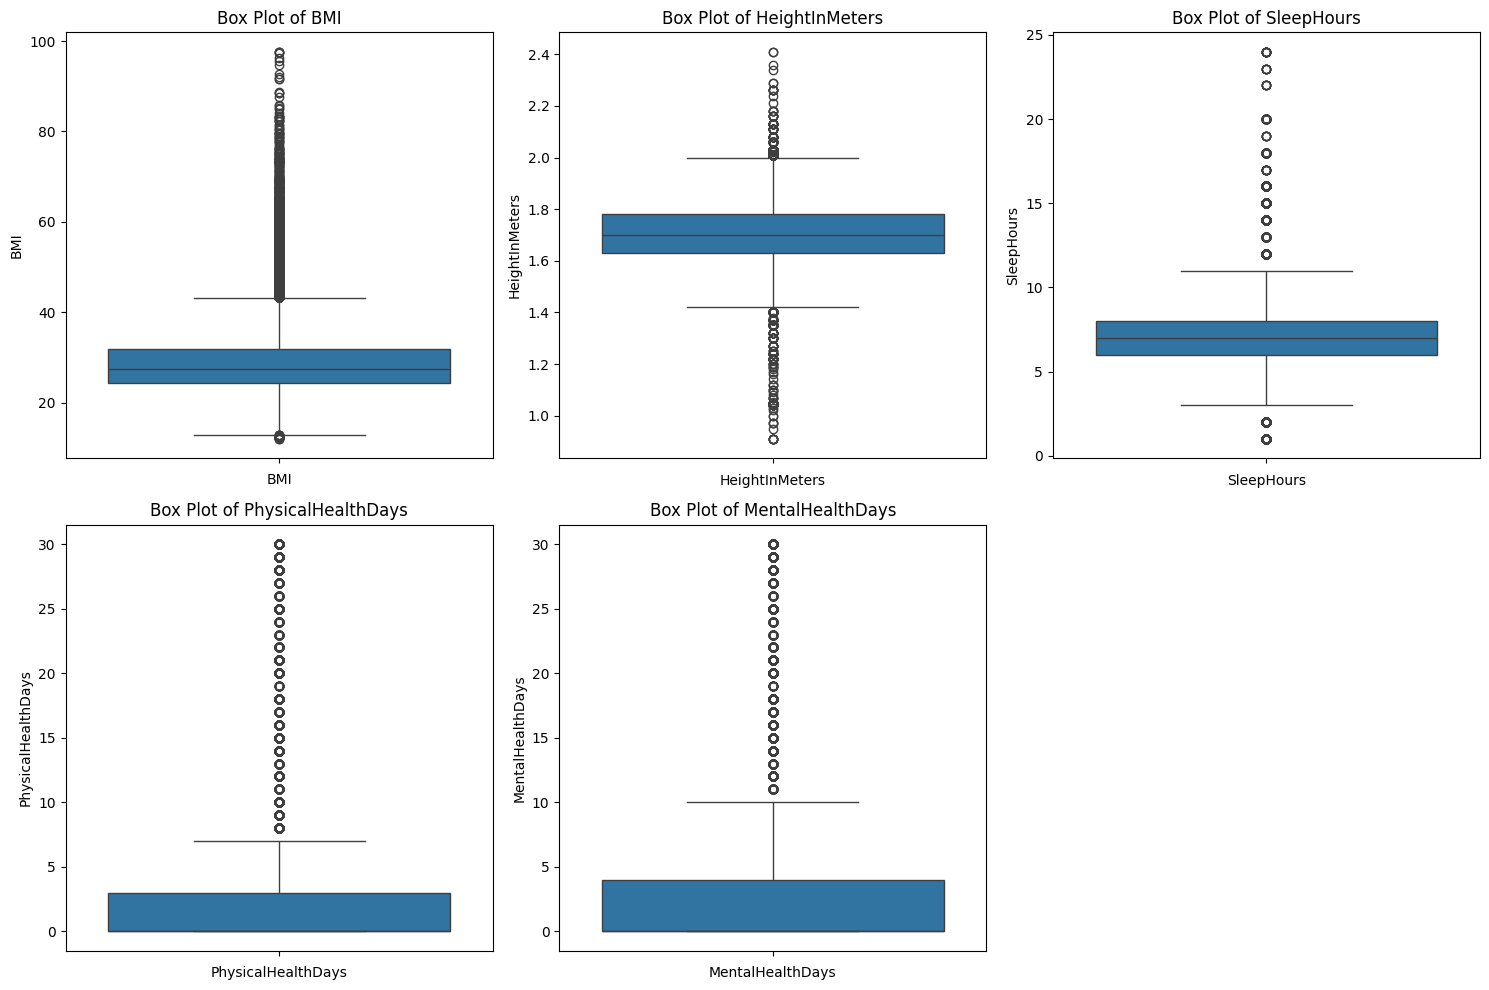

In [68]:
X = df_selected[['BMI', 'HeightInMeters', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays']]
y = df['HadHeartAttack']

print(X.describe())

# Create box plots for each feature in X
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 3, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=X[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [69]:
# Categorization

# Define thresholds for categorization
bmi_thresholds = df_num[top_features_rf]['BMI'].quantile([0.25, 0.75])
height_thresholds = df_num[top_features_rf]['HeightInMeters'].quantile([0.25, 0.75])
sleep_hours_thresholds = df_num[top_features_rf]['SleepHours'].quantile([0.25, 0.75])
physical_health_days_thresholds = df_num[top_features_rf]['PhysicalHealthDays'].quantile([0, 1])
mental_health_days_thresholds = df_num[top_features_rf]['MentalHealthDays'].quantile([0, 1])


# Create a copy to avoid SettingWithCopyWarning
df_selected = df_num[top_features_rf].copy()

# Categorize BMI
df_selected.loc[:, 'BMI'] = pd.cut(
    df_selected['BMI'],
    bins=[-float('inf'), bmi_thresholds.iloc[0], bmi_thresholds.iloc[1], float('inf')],
    labels=['Low', 'Normal', 'High']
)

# Categorize HeightInMeters
df_selected.loc[:, 'HeightInMeters'] = pd.cut(
    df_selected['HeightInMeters'],
    bins=[-float('inf'), height_thresholds.iloc[0], height_thresholds.iloc[1], float('inf')],
    labels=['Small', 'Normal', 'Tall']
)

# Categorize SleepHours
df_selected.loc[:, 'SleepHours'] = pd.cut(
    df_selected['SleepHours'],
    bins=[-float('inf'), sleep_hours_thresholds.iloc[0], sleep_hours_thresholds.iloc[1], float('inf')],
    labels=['Short', 'Normal', 'Long']
)

# Categorize PhysicalHealthDays
df_selected.loc[:, 'PhysicalHealthDays'] = df_selected['PhysicalHealthDays'].apply(lambda x: 0 if x == 0 else 1)

# Categorize MentalHealthDays
df_selected.loc[:, 'MentalHealthDays'] = df_selected['MentalHealthDays'].apply(lambda x: 0 if x == 0 else 1)

df_selected[['BMI', 'HeightInMeters', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays']].head()



/var/folders/94/tj1gqv8s2nn5mbnb9k35_gvc0000gn/T/ipykernel_9328/4256762248.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Normal', 'Normal', 'Normal', 'Normal', 'High', ..., 'High', 'Normal', 'Normal', 'Normal', 'High']
Length: 246022
Categories (3, object): ['Low' < 'Normal' < 'High']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_selected.loc[:, 'BMI'] = pd.cut(
/var/folders/94/tj1gqv8s2nn5mbnb9k35_gvc0000gn/T/ipykernel_9328/4256762248.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Small', 'Normal', 'Tall', 'Normal', 'Small', ..., 'Normal', 'Tall', 'Normal', 'Normal', 'Tall']
Length: 246022
Categories (3, object): ['Small' < 'Normal' < 'Tall']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_selected.loc[:, 'HeightInMeters'] = pd.cut(

,BMI,HeightInMeters,SleepHours,PhysicalHealthDays,MentalHealthDays
0,Normal,Small,Long,1.0,0.0
1,Normal,Normal,Short,0.0,0.0
2,Normal,Tall,Normal,0.0,0.0
3,Normal,Normal,Long,1.0,0.0
4,High,Small,Short,1.0,1.0


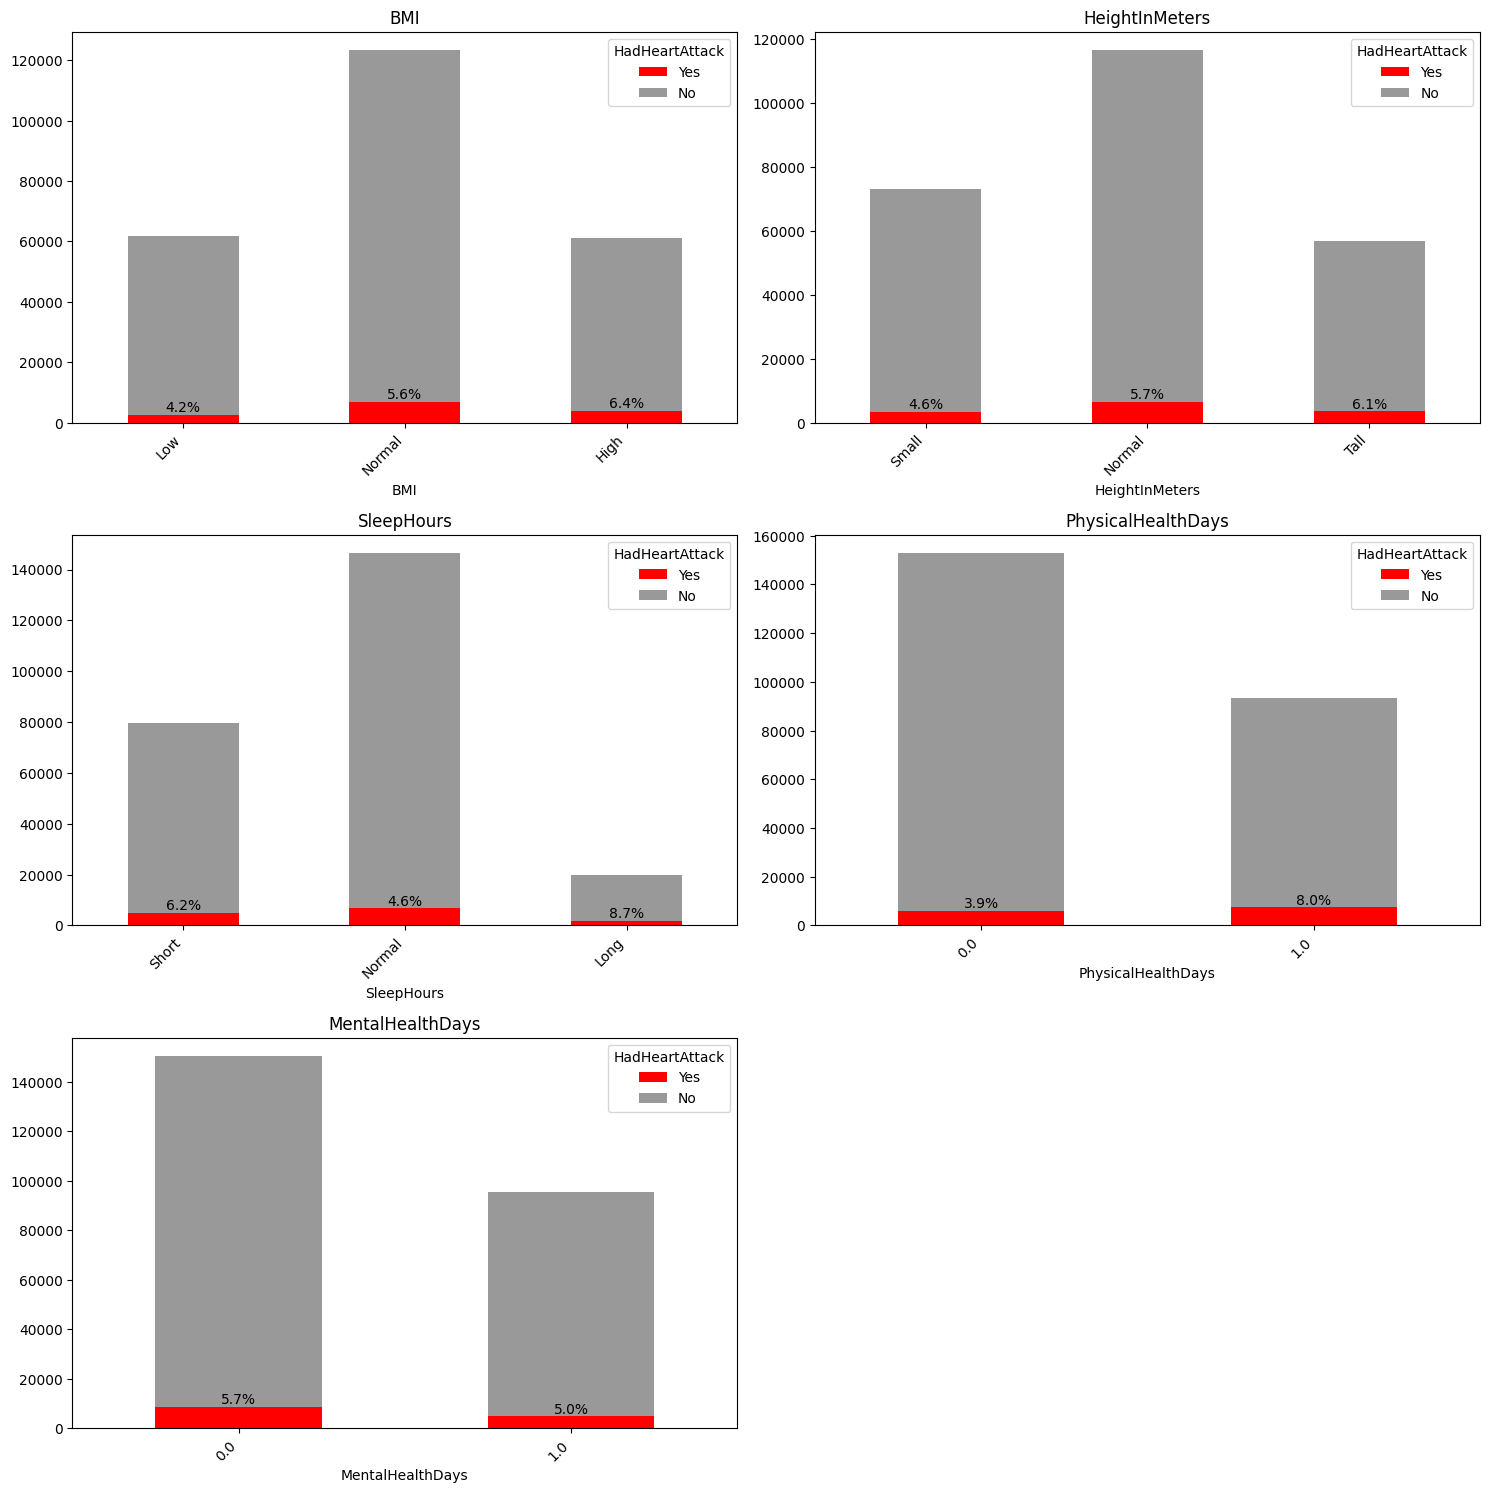

In [71]:
# Select object type columns excluding 'HadHeartAttack'
object_columns = df_selected[['BMI', 'HeightInMeters', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays']].columns

# Determine the layout of the subplots
num_cols = 2  # Number of columns in the subplot grid
num_rows = (len(object_columns) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(15, num_rows * 5))  # Increased figure size for better readability

for i, col in enumerate(object_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Create a cross-tabulation of the current column and HadHeartAttack with counts
    cross_tab = pd.crosstab(df_selected[col], df['HadHeartAttack'])
    
    # Reorder columns to have 'Yes' on top
    cross_tab = cross_tab[['Yes', 'No']] if 'Yes' in cross_tab.columns else cross_tab
    
    # Plot stacked bar chart with custom colors
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['red', '#999'])
    
    # Calculate and display the percentage of "Yes" for HadHeartAttack
    if 'Yes' in cross_tab.columns:
        yes_counts = cross_tab['Yes']
        total_counts = cross_tab.sum(axis=1)
        proportions = yes_counts / total_counts
        for idx, (count, prop) in enumerate(zip(yes_counts, proportions)):
            plt.text(idx, count, f'{prop:.1%}', ha='center', va='bottom')
    
    plt.title(col)
    plt.legend(title='HadHeartAttack', loc='upper right')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()


### 3. Apply One-Hot Encoding


In [81]:
# Apply one-hot encoding to the categorical columns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Identify categorical columns
categorical_columns = df_selected.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify binary and multi-category categorical columns
binary_columns = [col for col in categorical_columns if df_selected[col].nunique() == 2]
multi_category_columns = [col for col in categorical_columns if df_selected[col].nunique() > 2]

# Define a transformer to map binary categorical variables to 0 and 1
binary_transformer = FunctionTransformer(lambda x: x.map({'No': 0, 'Yes': 1}))

# Define OneHotEncoder for multi-category categorical variables
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Create ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_columns),
        ('onehot', onehot_encoder, multi_category_columns)
    ],
    remainder='passthrough'
)

# Apply the transformations to the data
df_encoded = preprocessor.fit_transform(df_selected)

# Get the names of the new one-hot encoded columns
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(multi_category_columns)

# Combine binary column names and one-hot encoded column names
encoded_columns = binary_columns + list(onehot_feature_names)

# Add remaining non-categorical columns
non_categorical_columns = [col for col in df_selected.columns if col not in categorical_columns]
encoded_columns += non_categorical_columns

# Create a new DataFrame with the encoded features
df_encoded = pd.DataFrame(df_encoded, columns=encoded_columns)

# Add the target variable to the dataframe
df_encoded['HadHeartAttack'] = df_num['HadHeartAttack']

# If 'HadHeartAttack' is in the DataFrame and is binary, map it to 0 and 1
if 'HadHeartAttack' in df_encoded.columns:
    df_encoded['HadHeartAttack'] = df_encoded['HadHeartAttack'].map({'No': 0, 'Yes': 1})


df_encoded.head()

,BMI_High,BMI_Low,BMI_Normal,HeightInMeters_Normal,HeightInMeters_Small,HeightInMeters_Tall,SleepHours_Long,SleepHours_Normal,SleepHours_Short,HadAngina,...,TetanusLast10Tdap,ECigaretteUsage,AlcoholDrinkers,FluVaxLast12,CovidPos,HadArthritis,HIVTesting,PhysicalActivities,ChestScan,HadHeartAttack
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


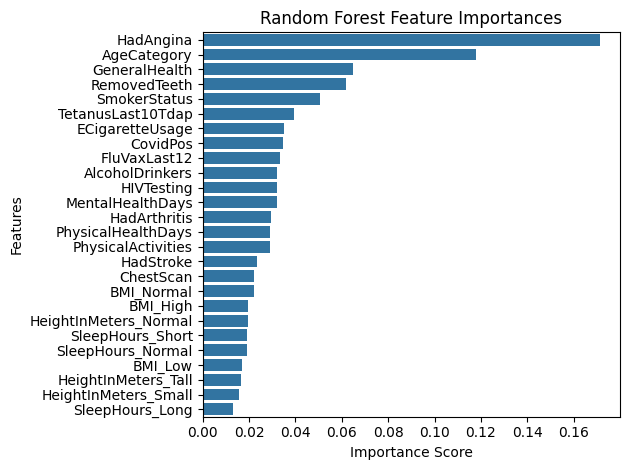

Feature Importances:
HadAngina                0.171401
AgeCategory              0.117847
GeneralHealth            0.064782
RemovedTeeth             0.061680
SmokerStatus             0.050474
TetanusLast10Tdap        0.039399
ECigaretteUsage          0.035085
CovidPos                 0.034824
FluVaxLast12             0.033348
AlcoholDrinkers          0.032253
HIVTesting               0.032091
MentalHealthDays         0.032075
HadArthritis             0.029416
PhysicalHealthDays       0.028950
PhysicalActivities       0.028904
HadStroke                0.023423
ChestScan                0.022315
BMI_Normal               0.022106
BMI_High                 0.019564
HeightInMeters_Normal    0.019476
SleepHours_Short         0.019193
SleepHours_Normal        0.019122
BMI_Low                  0.016924
HeightInMeters_Tall      0.016619
HeightInMeters_Small     0.015558
SleepHours_Long          0.013169
dtype: float64


In [83]:
# Define features and target from df_encoded
X = df_encoded.drop('HadHeartAttack', axis=1)
y = df_encoded['HadHeartAttack']

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importances
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Display feature importances
print("Feature Importances:")
print(feature_importances)

## Predictive Analysis

- In this phaes, I will explore the following three models:
    - Random Forest
    - Gradient Boosting
    - Neural Network


TODO
- Apply Threshold for agegroup auto or manually
- then apply one-hot encoding